# MTA Data Challenge Solutions

In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import formulas as fm

### Question 1:  Get the Data, Understand the Data

In [2]:
# Source = http://web.mta.info/developers/turnstile.html
dates = ['190803',
        '190810',
        '190817',
        '190824',
        '190831',
        '190907',
        '190914',
        '190921',
        '190928']

turns_df = fm.get_data(dates)

In [3]:
turns_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,00:00:00,REGULAR,7148288,2418935
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,04:00:00,REGULAR,7148306,2418939
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,08:00:00,REGULAR,7148326,2418975
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,12:00:00,REGULAR,7148441,2419042
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,16:00:00,REGULAR,7148647,2419101


In [4]:
turns_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [5]:
turns_df.columns = [column.strip() for column in turns_df.columns]
turns_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

### Question 2: Convert the Date column to a Datetime Type

In [6]:
#This adds a datetime column which is formatted by Date and has the hour element
turns_df = fm.Clean_Date(turns_df)

In [7]:
turns_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,Weekday
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-07-27,1900-01-01 00:00:00,REGULAR,7148288,2418935,2019-07-27 00:00:00,Sat
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-07-27,1900-01-01 04:00:00,REGULAR,7148306,2418939,2019-07-27 04:00:00,Sat
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-07-27,1900-01-01 08:00:00,REGULAR,7148326,2418975,2019-07-27 08:00:00,Sat
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-07-27,1900-01-01 12:00:00,REGULAR,7148441,2419042,2019-07-27 12:00:00,Sat
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-07-27,1900-01-01 16:00:00,REGULAR,7148647,2419101,2019-07-27 16:00:00,Sat


### Challenge 3 - Grouping
Each row is a turnstile, identified by a combination of the C/A, UNIT, SCP, and STATION columns, with information on entries and exits at that turnstile every n hours. (What is n?) We want total daily entries. Group the data so that it represents daily entries for each turnstile (hint: pd.groupby or DataFrame.groupby)

In [8]:
single = turns_df[(turns_df['C/A'] == 'A002')&\
        (turns_df['SCP'] == '02-00-00')&\
        (turns_df['UNIT'] == 'R051')&\
        (turns_df['STATION'] == '59 ST')]

single.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,Weekday
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-07-27,1900-01-01 00:00:00,REGULAR,7148288,2418935,2019-07-27 00:00:00,Sat
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-07-27,1900-01-01 04:00:00,REGULAR,7148306,2418939,2019-07-27 04:00:00,Sat
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-07-27,1900-01-01 08:00:00,REGULAR,7148326,2418975,2019-07-27 08:00:00,Sat
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-07-27,1900-01-01 12:00:00,REGULAR,7148441,2419042,2019-07-27 12:00:00,Sat
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-07-27,1900-01-01 16:00:00,REGULAR,7148647,2419101,2019-07-27 16:00:00,Sat


#### Want to check if the time values are unique.


In [9]:
single['TIME'].unique()


array(['1900-01-01T00:00:00.000000000', '1900-01-01T04:00:00.000000000',
       '1900-01-01T08:00:00.000000000', '1900-01-01T12:00:00.000000000',
       '1900-01-01T16:00:00.000000000', '1900-01-01T20:00:00.000000000'],
      dtype='datetime64[ns]')

It appears so with just this 1 entry but is it so for all entries?? It looks like there are several different values. So I would rather create a column that just extracts Hours from that time:

In [10]:
turns_df['TIME'].unique()

array(['1900-01-01T00:00:00.000000000', '1900-01-01T04:00:00.000000000',
       '1900-01-01T08:00:00.000000000', ...,
       '1900-01-01T21:31:28.000000000', '1900-01-01T08:26:30.000000000',
       '1900-01-01T07:18:41.000000000'], dtype='datetime64[ns]')

In [12]:
turns_df['TIME'] = turns_df['DATETIME'].apply(lambda x: x.hour)
turns_df.sample(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,Weekday
25882,D005,R398,00-06-00,NEW UTRECHT AV,ND,BMT,2019-08-27,9,REGULAR,585,194,2019-08-27 09:00:00,Tue
39045,J007,R377,00-06-01,FLUSHING AV,JM,BMT,2019-09-13,5,REGULAR,10796369,11418348,2019-09-13 05:00:00,Fri
192590,R551,R072,01-03-00,34 ST-HUDSON YD,7,IRT,2019-09-04,8,REGULAR,104212,15307,2019-09-04 08:00:00,Wed
60177,N094,R029,01-03-06,WORLD TRADE CTR,ACE23,IND,2019-08-06,8,REGULAR,1580021029,1829101573,2019-08-06 08:00:00,Tue
81189,N312,R339,00-00-01,36 ST,MR,IND,2019-08-11,5,REGULAR,480077,265552,2019-08-11 05:00:00,Sun


In [13]:
#Check the data for any duplicates to see if our groupby's are in fact creating unique groups
(turns_df.groupby(['C/A', 'SCP', 'STATION', 'DATETIME'])
                ['ENTRIES'].count()
                .reset_index()
                .sort_values(by='ENTRIES', ascending=False)).head(3)

,C/A,SCP,STATION,DATETIME,ENTRIES
47992,A034,03-05-03,14 ST-UNION SQ,2019-08-13 09:00:00,2
47983,A034,03-05-03,14 ST-UNION SQ,2019-08-11 21:00:00,2
1787723,R622,00-00-07,FRANKLIN AV,2019-08-22 04:59:02,2


In [14]:
#Looks like those duplicates occur on the DESC
turns_df.DESC.value_counts()

REGULAR       1845436
RECOVR AUD       7577
Name: DESC, dtype: int64

In [15]:
#Let's drop all rows with a DESC of RECOVR AUD
turns_df_copy = turns_df.copy()
turns_df = turns_df[turns_df['DESC']=='REGULAR']

In [16]:
#Good to go!
(turns_df.groupby(['C/A', 'SCP', 'STATION', 'DATETIME'])
                ['ENTRIES'].count()
                .reset_index()
                .sort_values(by='ENTRIES', ascending=False)).head(3)

,C/A,SCP,STATION,DATETIME,ENTRIES
0,A002,02-00-00,59 ST,2019-07-27 00:00:00,1
1230327,R138,00-03-02,34 ST-PENN STA,2019-08-06 10:00:00,1
1230297,R138,00-03-02,34 ST-PENN STA,2019-08-01 10:00:00,1


In [17]:
(turns_df.groupby(['C/A', 'SCP', 'STATION', 'DATETIME'])
                ['ENTRIES', 'EXITS']
                .median().reset_index()).head()

<ipython-input-17-ecda282ca826>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (turns_df.groupby(['C/A', 'SCP', 'STATION', 'DATETIME'])


,C/A,SCP,STATION,DATETIME,ENTRIES,EXITS
0,A002,02-00-00,59 ST,2019-07-27 00:00:00,7148288,2418935
1,A002,02-00-00,59 ST,2019-07-27 04:00:00,7148306,2418939
2,A002,02-00-00,59 ST,2019-07-27 08:00:00,7148326,2418975
3,A002,02-00-00,59 ST,2019-07-27 12:00:00,7148441,2419042
4,A002,02-00-00,59 ST,2019-07-27 16:00:00,7148647,2419101


#### Challenge 3 Observations:
After looking at the entries at given times, it is clear that the number does not actually reflect the entries in a given time period as there is no awy over 5 million people could go thru a turnstile in such a short period.  Looking at the data, it appears that the Entries/Exits are a cumulative sum with some unknown starting period

### Challenge 4 We will plot the daily time series for a single turnstile.

Select one turnstile (combination of [C/A, UNIT, SCP, STATION]) Filter your pandas DataFrame so it only represents a single turnstile (make sure that turnstile has entries for multiple days). Using matplotlib, create a plot with the days on the X axis and the daily entries for that turnstile on the Y axis You can use the following as a starting point:

plt.figure(figsize=(10,3))
plt.plot(<days>,<entries>)

Text(0.5, 1.0, 'Using 1 turnstile at 59 st')

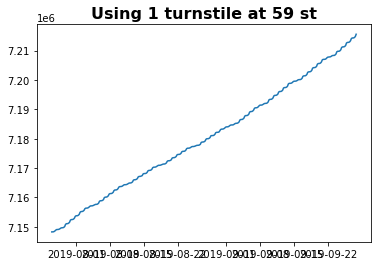

In [19]:
#Using the single dataframe from above - single @ 59st
plt.plot(single['DATETIME'], single['ENTRIES'])
plt.title('Using 1 turnstile at 59 st', weight='bold', size=16)

Before grouping all this, we must first remove the cumulative and create a new column with the actual entries

In [20]:
turns_sort = turns_df.sort_values(by=['DATETIME']).reset_index()
turns_sort.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,Weekday
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-07-27,0,REGULAR,7148288,2418935,2019-07-27,Sat
1,112391,N605,R024,00-05-01,SUTPHIN-ARCHER,EJZ,IND,2019-07-27,0,REGULAR,0,1168,2019-07-27,Sat
2,112349,N605,R024,00-05-00,SUTPHIN-ARCHER,EJZ,IND,2019-07-27,0,REGULAR,33556743,16777216,2019-07-27,Sat
3,198692,R612,R057,01-03-03,ATL AV-BARCLAY,BDNQR2345,IRT,2019-07-27,0,REGULAR,2120496,1957954,2019-07-27,Sat
4,112307,N605,R024,00-00-06,SUTPHIN-ARCHER,EJZ,IND,2019-07-27,0,REGULAR,5050187,2146519,2019-07-27,Sat


In [21]:
turns_sort['Entry_Diff']=turns_sort.groupby(['STATION','UNIT','SCP'])['ENTRIES'].diff(1)
turns_sort['Exit_Diff']=turns_sort.groupby(['STATION','UNIT','SCP'])['EXITS'].diff(1)


In [22]:
turns_sort[turns_sort['UNIT']=='R051'].head(5)

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,Weekday,Entry_Diff,Exit_Diff
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-07-27,0,REGULAR,7148288,2418935,2019-07-27,Sat,NaN,NaN
556,164648,R245A,R051,01-00-03,59 ST,456NQRW,IRT,2019-07-27,0,REGULAR,3007547,6082904,2019-07-27,Sat,NaN,NaN
557,164606,R245A,R051,01-00-02,59 ST,456NQRW,IRT,2019-07-27,0,REGULAR,146208,278573,2019-07-27,Sat,NaN,NaN
558,164564,R245A,R051,01-00-01,59 ST,456NQRW,IRT,2019-07-27,0,REGULAR,226746,132393,2019-07-27,Sat,NaN,NaN
559,164522,R245A,R051,01-00-00,59 ST,456NQRW,IRT,2019-07-27,0,REGULAR,12866335,4573025,2019-07-27,Sat,NaN,NaN


# Do a bit Cleaning!

In [23]:
#Lets remove the null values
turns_sort.dropna(how='any', inplace=True)
turns_sort[(turns_sort['UNIT']=='R051') &\
          (turns_sort['SCP']=='00-05-01')].head(5)

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,Weekday,Entry_Diff,Exit_Diff
6824,164439,R245,R051,00-05-01,59 ST,456NQRW,IRT,2019-07-27,4,REGULAR,13199310,5622440,2019-07-27 04:00:00,Sat,67.0,12.0
11384,164440,R245,R051,00-05-01,59 ST,456NQRW,IRT,2019-07-27,8,REGULAR,13199404,5622473,2019-07-27 08:00:00,Sat,94.0,33.0
14908,164441,R245,R051,00-05-01,59 ST,456NQRW,IRT,2019-07-27,12,REGULAR,13199554,5622540,2019-07-27 12:00:00,Sat,150.0,67.0
19846,164442,R245,R051,00-05-01,59 ST,456NQRW,IRT,2019-07-27,16,REGULAR,13199751,5622594,2019-07-27 16:00:00,Sat,197.0,54.0
26651,164443,R245,R051,00-05-01,59 ST,456NQRW,IRT,2019-07-27,20,REGULAR,13200008,5622646,2019-07-27 20:00:00,Sat,257.0,52.0


#### Now lets look for weird values that don't make sense and see how we can either remove or change

In [25]:
turns_sort[turns_sort['Entry_Diff']<0]['STATION'].count() 

16667

Looking at the MTA site, they say this happens when turnstile goes in reverse. To remedy this we'll just take the absolute value

In [26]:
turns_sort['Entry_Diff'] = abs(turns_sort['Entry_Diff'])
turns_sort['Exit_Diff']=abs(turns_sort['Exit_Diff'])
turns_sort[turns_sort['Entry_Diff']<0]['STATION'].count()

0

In [27]:
turns_out = turns_sort.groupby(['STATION','UNIT','SCP','C/A', 'DATETIME', 'DATE'])['Entry_Diff'].sum().reset_index()
turns_out[turns_out['Entry_Diff']>8000].count()

STATION       240
UNIT          240
SCP           240
C/A           240
DATETIME      240
DATE          240
Entry_Diff    240
dtype: int64

Looks like something weird happened around August 28.  Either way, assuming that a max of 2000 people can go thru a turnstile in 1 hour, can assume that iin a 4 hour window, it would be impossible for more than 8000 people to go enter.  Will remove rows with that condition

In [28]:

turns_out = turns_out[turns_out['Entry_Diff']<8000]
turns_out[turns_out['Entry_Diff']>8000].count()

STATION       0
UNIT          0
SCP           0
C/A           0
DATETIME      0
DATE          0
Entry_Diff    0
dtype: int64

In [29]:
turns_clean = turns_out.copy()

### Challenge 5 
So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstiles-- same value for the C/A, UNIT and STATION columns, different values for the SCP column. We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, sum the counts from each turnstile belonging to that combo. (hint: pd.groupby)

In [30]:
turns_group = turns_clean.groupby(['C/A', 'UNIT', 'STATION', 'DATE']).sum().reset_index()
turns_group['DATE']= pd.to_datetime(turns_group['DATE'])

In [31]:
(turns_group[turns_group['DATE']=='2016-09-08'].
 sort_values(by='Entry_Diff', ascending=False).head(15))

,C/A,UNIT,STATION,DATE,Entry_Diff


### Challenge 6 
Similarly, combine everything in each station, and come up with daily time series for each STATION, by adding up all the turnstiles in a station

### Challenge 7 Plot the daily time series for a station.

### Challenge 8 Make one list of counts for one week for one station. 
Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. (hint: pandas datetime day of week may be useful) plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.

In [32]:
def Add_Weekday(data_frame, column='DATE'):

    dmap = {0:'Mon', 1: 'Tue', 2: 'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
    data_frame['Day_Number'] = data_frame[column].apply(lambda x: x.dayofweek)
    data_frame['Week'] = data_frame[column].apply(lambda x: x.week)
    data_frame['Weekday'] = data_frame['Day_Number'].map(dmap)
    return data_frame

In [33]:
turns_group = Add_Weekday(turns_group)
turns_group.head(2)

,C/A,UNIT,STATION,DATE,Entry_Diff,Day_Number,Week,Weekday
0,A002,R051,59 ST,2019-07-27,6018.0,5,30,Sat
1,A002,R051,59 ST,2019-07-28,6482.0,6,30,Sun


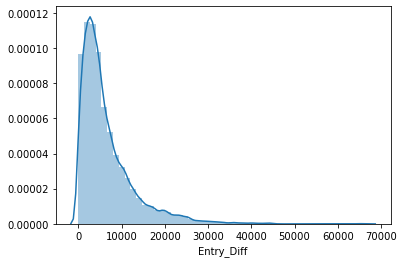

In [34]:
sns.distplot(turns_group['Entry_Diff'])

In [35]:
#Look at week 35
turns_35 = turns_group[turns_group['Week']==35]

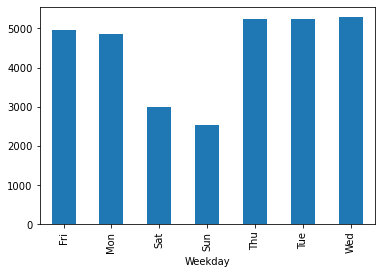

In [36]:
turns_35.groupby(['Weekday'])['Entry_Diff'].median().plot(kind='bar')

In [37]:
x = turns_35.groupby(["STATION", 'Weekday'])['Entry_Diff'].median().reset_index()
#(x='Weekday', y=x['Entry_Diff'], data=x, hue='STATION')
x = x.sort_values(by='STATION')

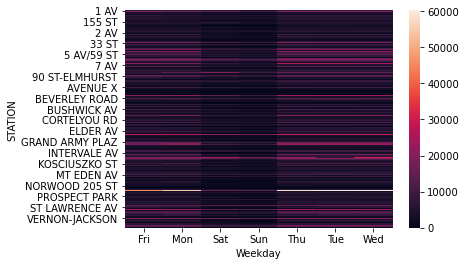

In [38]:

heatmap1_data = pd.pivot_table(x, values='Entry_Diff', 
                     index=['STATION'], 
                     columns='Weekday')
sns.heatmap(heatmap1_data)

### Challenge 9 Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate Challenge 10 

Make a single list of these total ridership values and plot it with

plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among different stations.

This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.

Additional Hint:

If you want to see which stations take the meat of the traffic, you can sort the total ridership counts and make a plt.bar graph. For this, you want to have two lists: the indices of each bar, and the values. The indices can just be 0,1,2,3,..., so you can do

In [39]:
turns_station = turns_group.groupby(["STATION"])['Entry_Diff'].sum().reset_index()

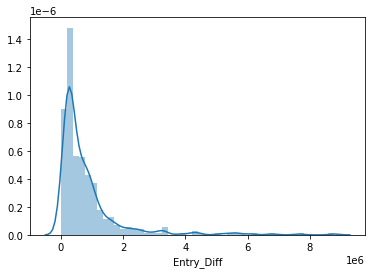

In [40]:
sns.distplot(turns_station['Entry_Diff'])

### Using this other technique to rank by Station using the rank function: 

In [41]:
x['Traffic_Rank'] = x['Entry_Diff'].rank(ascending=True,pct=True)*100
x.head()

,STATION,Weekday,Entry_Diff,Traffic_Rank
0,1 AV,Fri,7532.0,77.286470
1,1 AV,Mon,6881.5,73.318216
2,1 AV,Sat,2498.5,23.960695
3,1 AV,Sun,2141.0,19.576720
4,1 AV,Thu,8161.5,80.423280
